(matplotlib)=

# Matplotlib: plotting

:::{sidebar} Thanks

Many thanks to **Bill Wing** and **Christoph Deil** for review and
corrections.

:::

**Authors**: _Nicolas Rougier, Mike Müller, Gaël Varoquaux_

## Introduction

[Matplotlib](https://matplotlib.org/) is probably the most
used Python package for 2D-graphics. It provides both a quick
way to visualize data from Python and publication-quality figures in
many formats. We are going to explore matplotlib in interactive mode
covering most common cases.

### IPython, Jupyter, and matplotlib modes

The [Jupyter](https://jupyter.org) notebook and the
[IPython](https://ipython.org/) enhanced interactive Python, are
tuned for the scientific-computing workflow in Python,
in combination with Matplotlib:

For interactive matplotlib sessions, turn on the **matplotlib mode**.

### IPython sessions

To make plots open interactively in an IPython console session use the
following [magic
command](https://ipython.readthedocs.io/en/stable/interactive/magics.html):

In [1]:
%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


### Jupyter notebook

The Jupyter Notebook uses Matplotlib mode by default; that is, it inserts the figures into the notebook, as you run Matplotlib commands.

### pyplot

_pyplot_ provides a procedural interface to the matplotlib object-oriented
plotting library. It is modeled closely after Matlab™. Therefore, the
majority of plotting commands in pyplot have Matlab™ analogs with similar
arguments. Important commands are explained with interactive examples.

In [2]:
import matplotlib.pyplot as plt

## Simple plot

In this section, we want to draw the cosine and sine functions on the same
plot. Starting from the default settings, we'll enrich the figure step by
step to make it nicer.

First step is to get the data for the sine and cosine functions:

In [3]:
import numpy as np

X = np.linspace(-np.pi, np.pi, 256)
C, S = np.cos(X), np.sin(X)

`X` is now a numpy array with 256 values ranging from $-\pi$ to $+\pi$
(included). `C` is the cosine (256 values) and `S` is the sine (256
values).

To run the code, you can execute it in a Jupyter notebook or type it in an
IPython interactive session:

```bash
$ ipython --matplotlib
```

This brings us to the IPython prompt:

```text
IPython 0.13 -- An enhanced Interactive Python.
?       -> Introduction to IPython's features.
%magic  -> Information about IPython's 'magic' % functions.
help    -> Python's own help system.
object? -> Details about 'object'. ?object also works, ?? prints more.
```

### Plotting with default settings

:::{hint}

Documentation

- [plot tutorial](https://matplotlib.org/users/pyplot_tutorial.html)
- {func}`~plot()` command

:::

::: {note}
:class: dropdown

Matplotlib comes with a set of default settings that allow
customizing all kinds of properties. You can control the defaults of
almost every property in matplotlib: figure size and dpi, line width,
color and style, axes, axis and grid properties, text and font
properties and so on.

:::

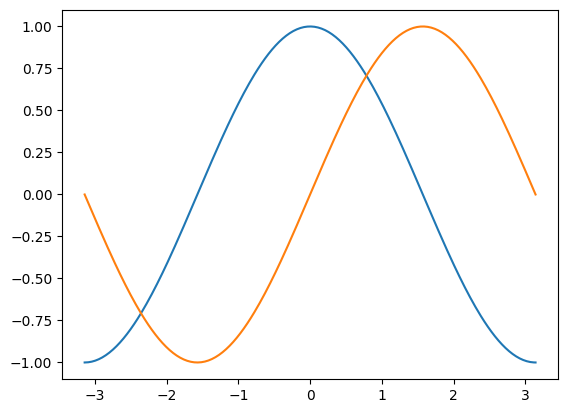

In [4]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-np.pi, np.pi, 256)
C, S = np.cos(X), np.sin(X)

plt.plot(X, C)
plt.plot(X, S);

::: {note}

You will notice that we used a semicolon (`;`) to end the last line in the
cell above. This is to prevent Jupyter or IPython echoing the return value of
this final expression back to us in the notebook or console session. It has no other effect; it does not affect the execution of the code.

:::

### Instantiating defaults

:::{hint}
Documentation

- [Customizing matplotlib](https://matplotlib.org/users/customizing.html)
  :::

In the plotting code below, you will see that we've instantiated (and
commented) all the figure settings that influence the appearance of the plot.

::: {note}
:class: dropdown

The settings have been explicitly set to their default values, but
now you can interactively play with the values to explore their
affect (see [Line properties](mpl-line-properties) and [Line styles](mpl-line-styles) below).

:::

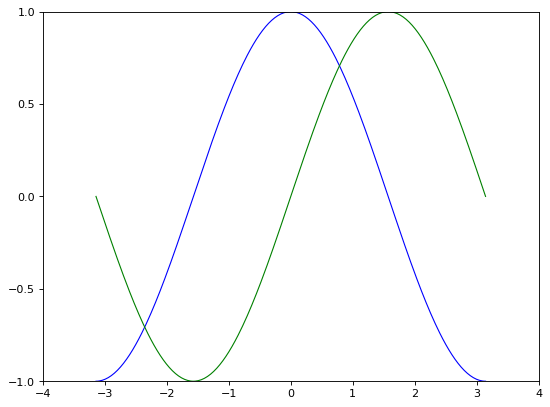

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Create a figure of size 8x6 inches, 80 dots per inch
plt.figure(figsize=(8, 6), dpi=80)

# Create a new subplot from a grid of 1x1
plt.subplot(1, 1, 1)

X = np.linspace(-np.pi, np.pi, 256)
C, S = np.cos(X), np.sin(X)

# Plot cosine with a blue continuous line of width 1 (pixels)
plt.plot(X, C, color="blue", linewidth=1.0, linestyle="-")

# Plot sine with a green continuous line of width 1 (pixels)
plt.plot(X, S, color="green", linewidth=1.0, linestyle="-")

# Set x limits
plt.xlim(-4.0, 4.0)

# Set x ticks
plt.xticks(np.linspace(-4, 4, 9))

# Set y limits
plt.ylim(-1.0, 1.0)

# Set y ticks
plt.yticks(np.linspace(-1, 1, 5));

# You could also save this figure using 72 dots per inch with:
# plt.savefig("exercise_2.png", dpi=72)

### Changing colors and line widths

:::{hint}
Documentation

- [Controlling line properties](https://matplotlib.org/users/pyplot_tutorial.html#controlling-line-properties)
- {class}`~matplotlib.lines.Line2D` API
  :::

::: {note}
:class: dropdown

First step, we want to have the cosine in blue and the sine in red and a
slightly thicker line for both of them. We'll also slightly alter the figure
size to make it more horizontal.
:::

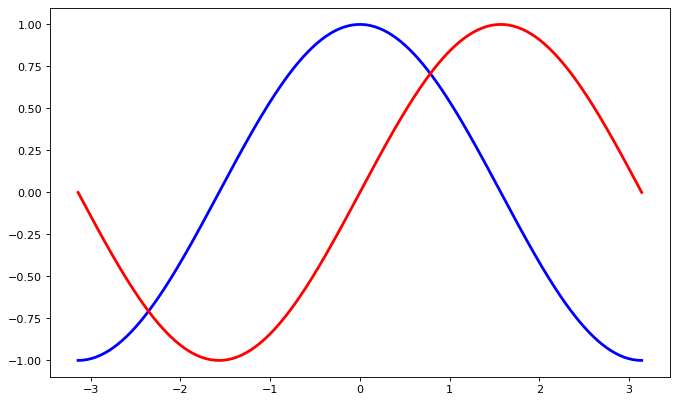

In [6]:
# Generate the plot.
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-");

# Get the current figure (gcf) into a variable for later use.
fig_to_update = plt.gcf()

::: {note}
:class: dropdown

The final line `fig_to_update = plt.gcf()` uses `plt.gcf()` to Get the Current Figure — the figure we've just built in the cell. We then store that figure in the `fig_to_update` variable, so we can restore it, and update it, in the cells below. This is not a very common pattern in general, we are using it here to show you how to build up a figure in steps.

:::

### Setting limits

:::{hint}
Documentation

- {func}`xlim()` command
- {func}`ylim()` command
  :::

::: {note}
:class: dropdown

Current limits of the figure are a bit too tight and we want to make
some space in order to clearly see all data points.
:::

::: {note}
:class: dropdown

Following on from the note above, for the purposes of the tutorial, we first
restore the figure we stored above (with `plt.figure(fig_to_update)`, then we
add the limits to the figure, and finally, we press Jupyter to display the
figure by putting the figure variable as an expression in the last line of the
cell.

Again, this pattern of restore, update, redisplay is not a very common one in ordinary use of Matplotlib; we use it here to allow us to separate the various steps in the process of updating the figure.
:::

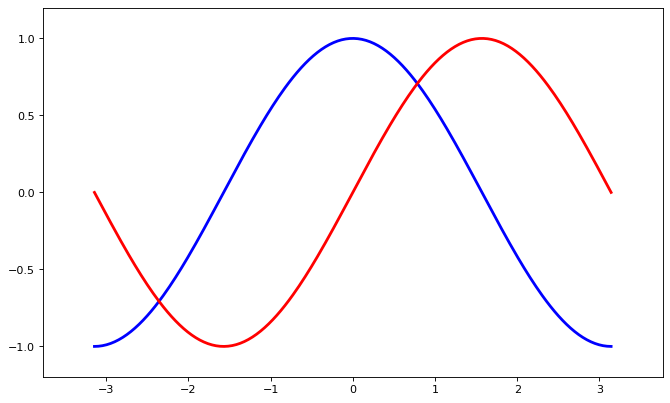

In [7]:
# Restore previous figure, ready to update below.
plt.figure(fig_to_update)

# Setting the axis limits.
plt.xlim(X.min() * 1.2, X.max() * 1.2)
plt.ylim(C.min() * 1.2, C.max() * 1.2)

# Make Jupyter display updated figure.
fig_to_update

### Setting ticks

:::{hint}
Documentation

- {func}`xticks()` command
- {func}`yticks()` command
- [Tick container](https://matplotlib.org/users/artists.html#axis-container)
- [Tick locating and formatting](https://matplotlib.org/api/ticker_api.html)
  :::

::: {note}
:class: dropdown

Current ticks are not ideal because they do not show the interesting values
($\pm \pi$, $\pm \frac{\pi}{2}$) for sine and cosine. We'll change them such
that they show only these values.
:::

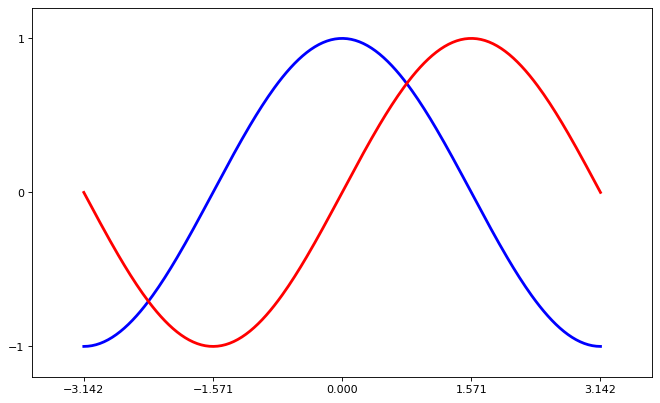

In [8]:
# Restore figure we are working on.
plt.figure(fig_to_update)

# Set x and y ticks.
plt.xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
plt.yticks([-1, 0, +1])

# Make Jupyter display updated figure.
fig_to_update

### Setting tick labels

:::{hint}
Documentation

- [Working with text](https://matplotlib.org/users/index_text.html)
- {func}`~xticks()` command
- {func}`~yticks()` command
- {meth}`~matplotlib.axes.Axes.set_xticklabels()`
- {meth}`~matplotlib.axes.Axes.set_yticklabels()`
  :::

::: {note}
:class: dropdown

Ticks are now properly placed but their label is not very explicit.
We could guess that 3.142 is $\pi$ but it would be better to make it
explicit. When we set tick values, we can also provide a
corresponding label in the second argument list. Note that we'll use
latex to allow for nice rendering of the label.
:::

{{ clear_floats }}

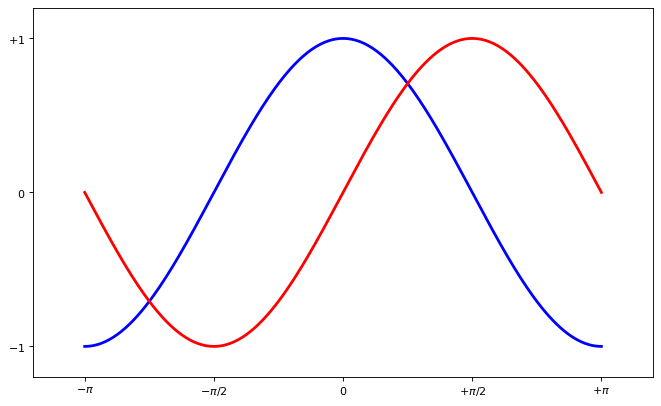

In [9]:
# Restore figure
plt.figure(fig_to_update)

# Update tick labels.
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
          [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([-1, 0, +1],
          [r'$-1$', r'$0$', r'$+1$'])

# Force display of updated figure.
fig_to_update

### Moving spines

:::{hint}
Documentation

- {mod}`~matplotlib.spines` API
- [Axis container](https://matplotlib.org/users/artists.html#axis-container)
- [Transformations tutorial](https://matplotlib.org/users/transforms_tutorial.html)
  :::

::: {note}
:class: dropdown

Spines are the lines connecting the axis tick marks and noting the
boundaries of the data area. They can be placed at arbitrary
positions and until now, they were on the border of the axis. We'll
change that since we want to have them in the middle. Since there are
four of them (top/bottom/left/right), we'll discard the top and right
by setting their color to none and we'll move the bottom and left
ones to coordinate 0 in data space coordinates.
:::

{{ clear_floats }}

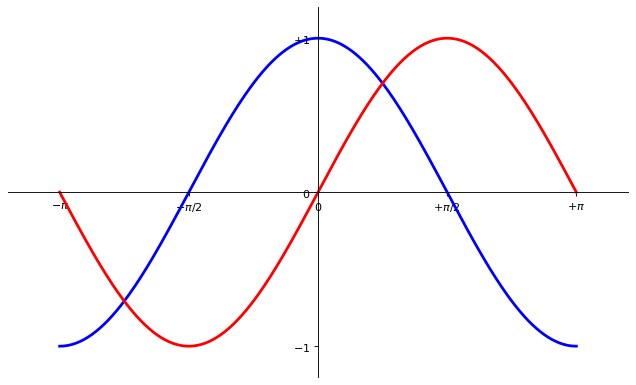

In [10]:
# Restore figure
plt.figure(fig_to_update)

# Update spines.
ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

# Force display of updated figure.
fig_to_update

### Adding a legend

:::{hint}
Documentation

- [Legend guide](https://matplotlib.org/users/legend_guide.html)
- {func}`legend()` command
- {mod}`~matplotlib.legend` API
  :::

::: {note}
:class: dropdown

Let's add a legend in the upper left corner. This only requires
adding the keyword argument label (that will be used in the legend
box) to the plot commands.

:::

{{ clear_floats }}

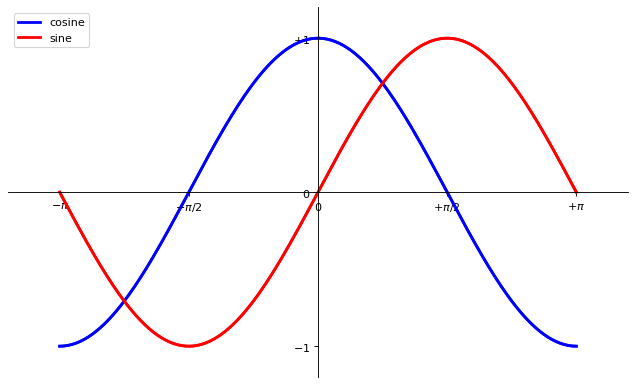

In [11]:
# Restore figure
plt.figure(fig_to_update)

# Add legend.
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-", label="sine")

plt.legend(loc='upper left')

# Force display of updated figure.
fig_to_update

### Annotate some points

:::{hint}
Documentation

- [Annotating axis](https://matplotlib.org/users/annotations_guide.html)
- {func}`annotate()` command
  :::

::: {note}
:class: dropdown

Let's annotate some interesting points using the annotate command. We
chose the $2\pi / 3$ value and we want to annotate both the sine and the
cosine. We'll first draw a marker on the curve as well as a straight
dotted line. Then, we'll use the annotate command to display some
text with an arrow.
:::

{{ clear_floats }}

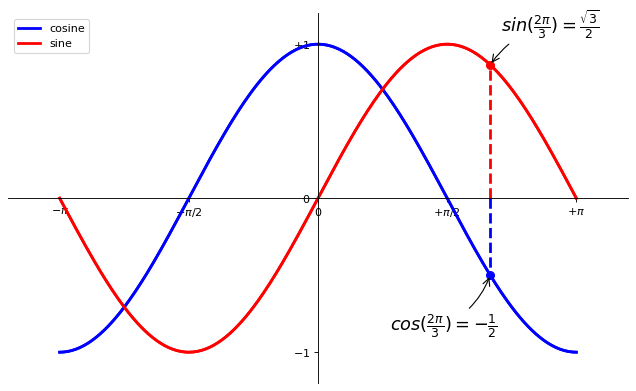

In [12]:
# Restore figure
plt.figure(fig_to_update)

# Annotate points.
t = 2 * np.pi / 3
plt.plot([t, t], [0, np.cos(t)], color='blue', linewidth=2.5, linestyle="--")
plt.scatter([t, ], [np.cos(t), ], 50, color='blue')

plt.annotate(r'$cos(\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(t, np.cos(t)), xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot([t, t],[0, np.sin(t)], color='red', linewidth=2.5, linestyle="--")
plt.scatter([t, ],[np.sin(t), ], 50, color='red')

plt.annotate(r'$sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
             xy=(t, np.sin(t)), xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

# Force display of updated figure.
fig_to_update

### Devil is in the details

:::{hint}
Documentation

- {mod}`~matplotlib.artist` API
- {meth}`~matplotlib.text.Text.set_bbox()` method
  :::

::: {note}
:class: dropdown

The tick labels are now hardly visible because of the blue and red
lines. We can make them bigger and we can also adjust their
properties such that they'll be rendered on a semi-transparent white
background. This will allow us to see both the data and the labels.
:::

{{ clear_floats }}

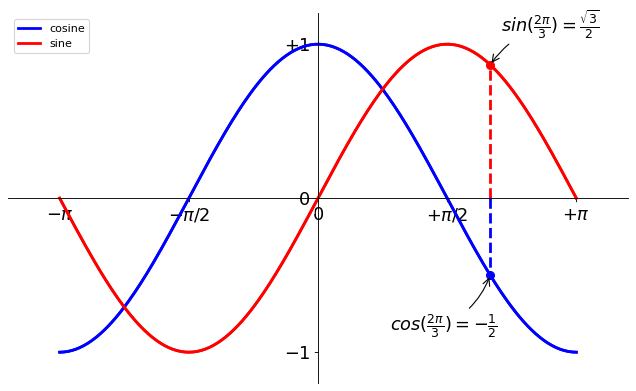

In [13]:
# Restore figure
plt.figure(fig_to_update)

# Set properties of tick labels.
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(16)
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.65))

# Force display of updated figure.
fig_to_update

## Figures, Subplots, Axes and Ticks

A **"figure"** in matplotlib means the whole window in the user interface.
Within this figure there can be **"subplots"**.

::: {note}
:class: dropdown

So far we have used implicit figure and axes creation. This is handy for
fast plots. We can have more control over the display using figure,
subplot, and axes explicitly. While subplot positions the plots in a
regular grid, axes allows free placement within the figure. Both can be
useful depending on your intention. We've already worked with figures and
subplots without explicitly calling them. When we call plot, matplotlib
calls {func}`gca` to get the current axes and gca in turn calls {func}`gcf` to
get the current figure. If there is none it calls {func}`figure` to make one,
strictly speaking, to make a `subplot(111)`. Let's look at the details.
:::

### Figures

::: {note}
:class: dropdown

A figure is a window in the GUI that has "Figure #" as title. Figures are
numbered starting from 1 as opposed to the normal Python way starting from 0.
This is clearly MATLAB-style. There are several parameters that determine what
the figure looks like:
:::

| Argument    | Default            | Description                                 |
| ----------- | ------------------ | ------------------------------------------- |
| `num`       | `1`                | number of figure                            |
| `figsize`   | `figure.figsize`   | figure size in inches (width, height)       |
| `dpi`       | `figure.dpi`       | resolution in dots per inch                 |
| `facecolor` | `figure.facecolor` | color of the drawing background             |
| `edgecolor` | `figure.edgecolor` | color of edge around the drawing background |
| `frameon`   | `True`             | draw figure frame or not                    |

::: {note}
:class: dropdown

The defaults can be specified in the resource file and will be used most of
the time. Only the number of the figure is frequently changed.

As with other objects, you can set figure properties with the `plt.setp`
function, or with the `set_`(something) methods.

When you work with the GUI, rather than in a notebook, you can close a figure
by clicking on the x in the upper right corner. But you can close a figure
programmatically by calling close. Depending on the argument it closes (1) the
current figure (no argument), (2) a specific figure (figure number or figure
instance as argument), or (3) all figures (`"all"` as argument).
:::

In [14]:
# Useful working in a GUI outside the notebook.
plt.close(1)     # Closes figure 1

### Subplots

::: {note}
:class: dropdown

With subplot you can arrange plots in a regular grid. You need to specify
the number of rows and columns and the number of the plot. Note that the
[gridspec](https://matplotlib.org/users/gridspec.html) command
is a more powerful alternative.
:::

{{ clear_floats }}

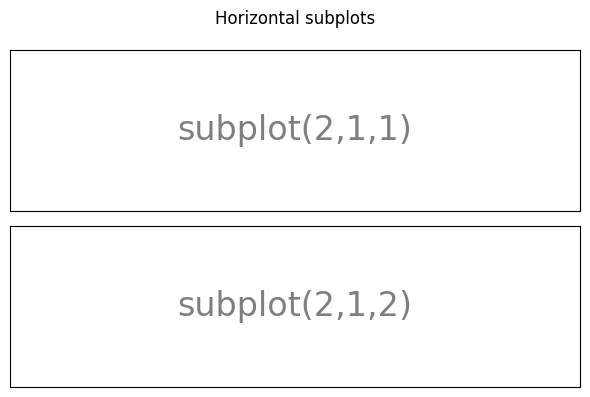

In [15]:
plt.figure(figsize=(6, 4))
plt.subplot(2, 1, 1)
plt.xticks([])
plt.yticks([])
plt.text(0.5, 0.5, "subplot(2,1,1)", ha="center", va="center", size=24, alpha=0.5)

plt.subplot(2, 1, 2)
plt.xticks([])
plt.yticks([])
plt.text(0.5, 0.5, "subplot(2,1,2)", ha="center", va="center", size=24, alpha=0.5)
# Title for whole figure (rather than current subplot).
plt.suptitle('Horizontal subplots')

plt.tight_layout()

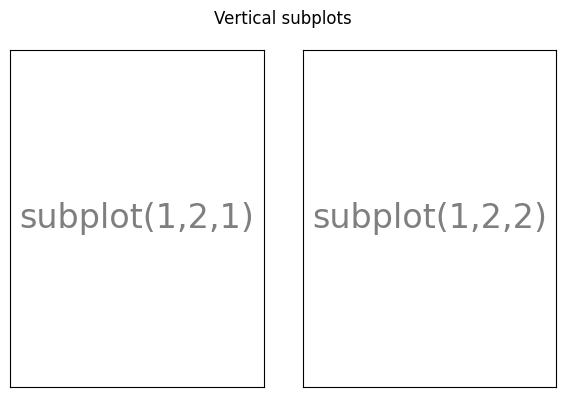

In [16]:
plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
plt.xticks([])
plt.yticks([])
plt.text(0.5, 0.5, "subplot(1,2,1)", ha="center", va="center", size=24, alpha=0.5)

plt.subplot(1, 2, 2)
plt.xticks([])
plt.yticks([])
plt.text(0.5, 0.5, "subplot(1,2,2)", ha="center", va="center", size=24, alpha=0.5)
plt.suptitle('Vertical subplots')

plt.tight_layout()

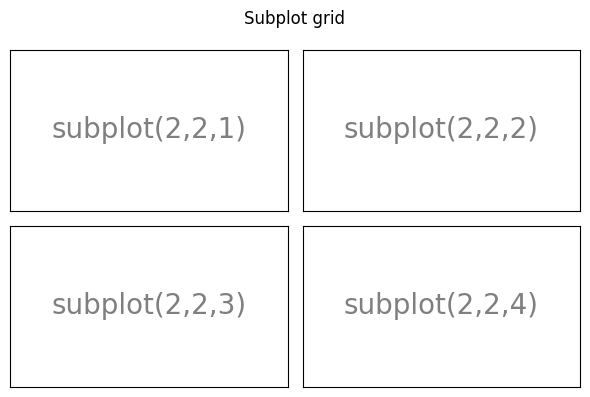

In [17]:
plt.figure(figsize=(6, 4))
plt.subplot(2, 2, 1)
plt.xticks([])
plt.yticks([])
plt.text(0.5, 0.5, "subplot(2,2,1)", ha="center", va="center", size=20, alpha=0.5)

plt.subplot(2, 2, 2)
plt.xticks([])
plt.yticks([])
plt.text(0.5, 0.5, "subplot(2,2,2)", ha="center", va="center", size=20, alpha=0.5)

plt.subplot(2, 2, 3)
plt.xticks([])
plt.yticks([])

plt.text(0.5, 0.5, "subplot(2,2,3)", ha="center", va="center", size=20, alpha=0.5)

plt.subplot(2, 2, 4)
plt.xticks([])
plt.yticks([])
plt.text(0.5, 0.5, "subplot(2,2,4)", ha="center", va="center", size=20, alpha=0.5)
plt.suptitle('Subplot grid')

plt.tight_layout()

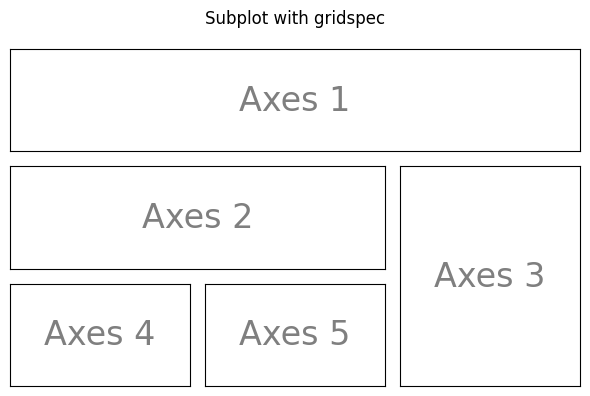

In [18]:
from matplotlib import gridspec

plt.figure(figsize=(6, 4))
G = gridspec.GridSpec(3, 3)

axes_1 = plt.subplot(G[0, :])
plt.xticks([])
plt.yticks([])
plt.text(0.5, 0.5, "Axes 1", ha="center", va="center", size=24, alpha=0.5)

axes_2 = plt.subplot(G[1, :-1])
plt.xticks([])
plt.yticks([])
plt.text(0.5, 0.5, "Axes 2", ha="center", va="center", size=24, alpha=0.5)

axes_3 = plt.subplot(G[1:, -1])
plt.xticks([])
plt.yticks([])
plt.text(0.5, 0.5, "Axes 3", ha="center", va="center", size=24, alpha=0.5)

axes_4 = plt.subplot(G[-1, 0])
plt.xticks([])
plt.yticks([])
plt.text(0.5, 0.5, "Axes 4", ha="center", va="center", size=24, alpha=0.5)

axes_5 = plt.subplot(G[-1, -2])
plt.xticks([])
plt.yticks([])
plt.text(0.5, 0.5, "Axes 5", ha="center", va="center", size=24, alpha=0.5)
plt.suptitle('Subplot with gridspec')

plt.tight_layout()

### Axes

Axes are very similar to subplots but allow placement of plots at any location
in the figure. So if we want to put a smaller plot inside a bigger one we do
so with axes.

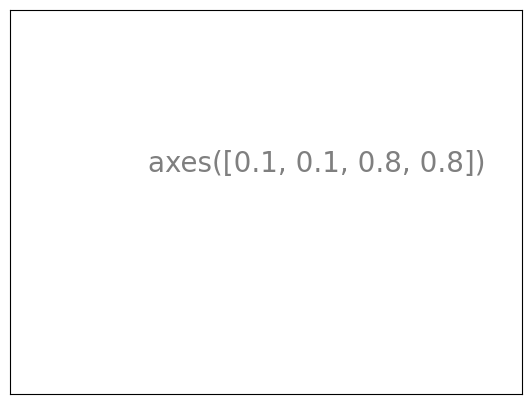

In [19]:
plt.axes((0.1, 0.1, 0.8, 0.8))
plt.xticks([])
plt.yticks([])
plt.text(
    0.6, 0.6, "axes([0.1, 0.1, 0.8, 0.8])", ha="center", va="center", size=20, alpha=0.5
);

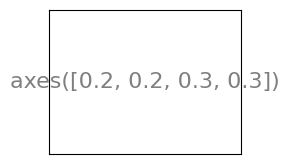

In [20]:
plt.axes((0.2, 0.2, 0.3, 0.3))
plt.xticks([])
plt.yticks([])
plt.text(
    0.5, 0.5, "axes([0.2, 0.2, 0.3, 0.3])", ha="center", va="center", size=16, alpha=0.5
);

### Ticks

Well formatted ticks are an important part of publishing-ready
figures. Matplotlib provides a totally configurable system for ticks. There are
tick locators to specify where ticks should appear and tick formatters to give
ticks the appearance you want. Major and minor ticks can be located and
formatted independently from each other. Per default minor ticks are not shown,
i.e. there is only an empty list for them because it is as `NullLocator` (see
below).

#### Tick Locators

Tick locators control the positions of the ticks. They are set as
follows:

```python
ax = plt.gca()
ax.xaxis.set_major_locator(eval(locator))
```

There are several locators for different kind of requirements:

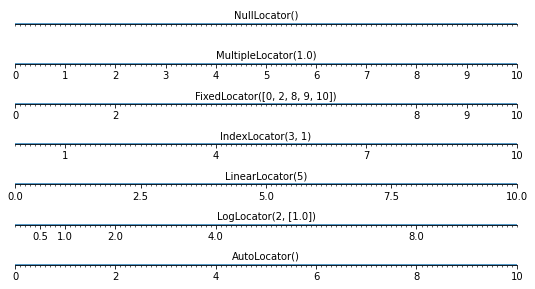

In [21]:
from matplotlib import ticker

def tickline():
    plt.xlim(0, 10), plt.ylim(-1, 1), plt.yticks([])
    ax = plt.gca()
    ax.spines["right"].set_color("none")
    ax.spines["left"].set_color("none")
    ax.spines["top"].set_color("none")
    ax.xaxis.set_ticks_position("bottom")
    ax.spines["bottom"].set_position(("data", 0))
    ax.yaxis.set_ticks_position("none")
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
    ax.plot(np.arange(11), np.zeros(11))
    return ax

locators = [
    "ticker.NullLocator()",
    "ticker.MultipleLocator(1.0)",
    "ticker.FixedLocator([0, 2, 8, 9, 10])",
    "ticker.IndexLocator(3, 1)",
    "ticker.LinearLocator(5)",
    "ticker.LogLocator(2, [1.0])",
    "ticker.AutoLocator()",
]

n_locators = len(locators)

size = 512, 40 * n_locators
dpi = 72.0
figsize = size[0] / float(dpi), size[1] / float(dpi)
fig = plt.figure(figsize=figsize, dpi=dpi)
fig.patch.set_alpha(0)

for i, locator in enumerate(locators):
    plt.subplot(n_locators, 1, i + 1)
    ax = tickline()
    ax.xaxis.set_major_locator(eval(locator))
    plt.text(5, 0.3, locator[7:], ha="center")

plt.subplots_adjust(bottom=0.01, top=0.99, left=0.01, right=0.99)

All of these "locators" (see code above) derive from the base class
{class}`matplotlib.ticker.Locator`. You can make your own locator deriving
from it. Handling dates as ticks can be especially tricky. Therefore,
matplotlib provides special locators in matplotlib.dates.

## Other Types of Plots: examples and exercises

### Regular Plots

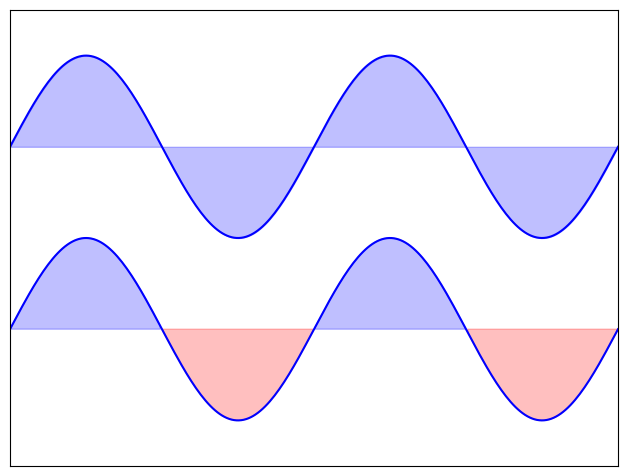

In [22]:
n = 256
X = np.linspace(-np.pi, np.pi, n)
Y = np.sin(2 * X)

plt.axes((0.025, 0.025, 0.95, 0.95))

plt.plot(X, Y + 1, color="blue", alpha=1.00)
plt.fill_between(X, 1, Y + 1, color="blue", alpha=0.25)

plt.plot(X, Y - 1, color="blue", alpha=1.00)
plt.fill_between(X, -1, Y - 1, (Y - 1) > -1, color="blue", alpha=0.25)
plt.fill_between(X, -1, Y - 1, (Y - 1) < -1, color="red", alpha=0.25)

plt.xlim(-np.pi, np.pi)
plt.xticks([])
plt.ylim(-2.5, 2.5)
plt.yticks([]);

::: {exercise-start}
:label: plot-fill-ex
:class: dropdown
:::

Starting from the code below, try to reproduce the graphic taking
care of filled areas:

:::{hint}
You need to use the {func}`fill_between()` command.
:::

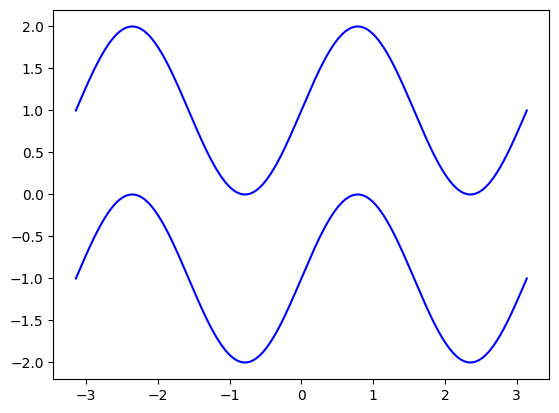

In [23]:
n = 256
X = np.linspace(-np.pi, np.pi, n)
Y = np.sin(2 * X)

plt.plot(X, Y + 1, color='blue', alpha=1.00)
plt.plot(X, Y - 1, color='blue', alpha=1.00)

::: {exercise-end}
:::

Click on the hidden code for the figure above for solution.

### Scatter Plots

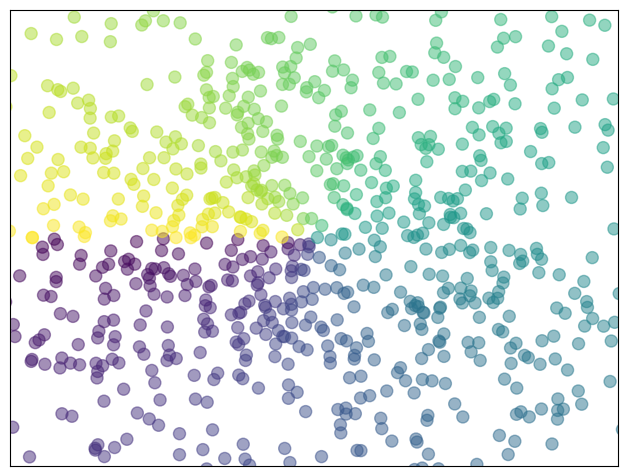

In [24]:
n = 1024
rng = np.random.default_rng()
X = rng.normal(0, 1, n)
Y = rng.normal(0, 1, n)
T = np.arctan2(Y, X)

plt.axes((0.025, 0.025, 0.95, 0.95))
plt.scatter(X, Y, s=75, c=T, alpha=0.5)

plt.xlim(-1.5, 1.5)
plt.xticks([])
plt.ylim(-1.5, 1.5)
plt.yticks([]);

::: {exercise-start}
:label: plot-scatter-ex
:class: dropdown
:::

Starting from the code below, try to reproduce the graphic taking
care of marker size, color and transparency.

:::{hint}
Color is given by angle of (X,Y).
:::

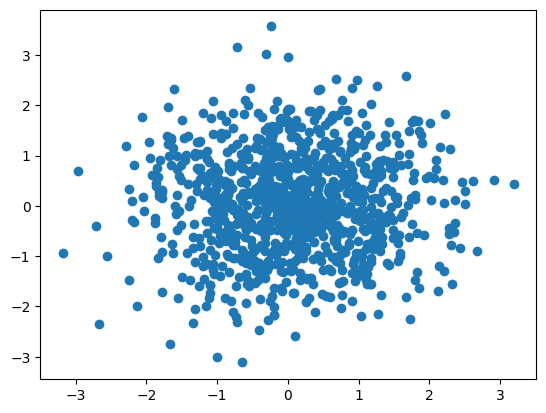

In [25]:
n = 1024
rng = np.random.default_rng()
X = rng.normal(0,1,n)
Y = rng.normal(0,1,n)

plt.scatter(X,Y)

::: {exercise-end}
:::

Click on the hidden code for the figure above for solution.

### Bar Plots

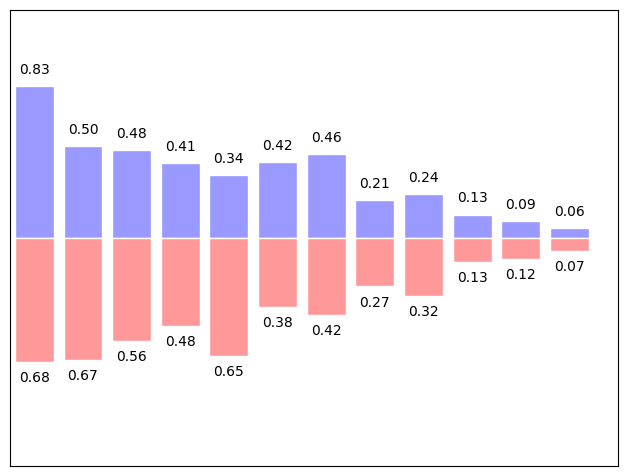

In [26]:
n = 12
X = np.arange(n)
rng = np.random.default_rng()
Y1 = (1 - X / n) * rng.uniform(0.5, 1.0, n)
Y2 = (1 - X / n) * rng.uniform(0.5, 1.0, n)

plt.axes((0.025, 0.025, 0.95, 0.95))
plt.bar(X, +Y1, facecolor="#9999ff", edgecolor="white")
plt.bar(X, -Y2, facecolor="#ff9999", edgecolor="white")

for x, y in zip(X, Y1):
    plt.text(x, y + 0.05, f"{y:.2f}", ha="center", va="bottom")

for x, y in zip(X, Y2):
    plt.text(x, -y - 0.05, f"{y:.2f}", ha="center", va="top")

plt.xlim(-0.5, n)
plt.xticks([])
plt.ylim(-1.25, 1.25)
plt.yticks([]);

::: {exercise-start}
:label: plot-bar-ex
:class: dropdown
:::

Starting from the code below, try to reproduce the graphic by
adding labels for red bars.

:::{hint}
You need to take care of text alignment.
:::

(-1.25, 1.25)

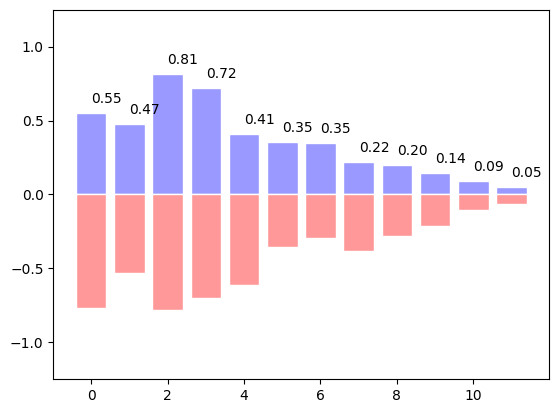

In [27]:
n = 12
X = np.arange(n)
rng = np.random.default_rng()
Y1 = (1 - X / float(n)) * rng.uniform(0.5, 1.0, n)
Y2 = (1 - X / float(n)) * rng.uniform(0.5, 1.0, n)

plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='white')
plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='white')

for x, y in zip(X, Y1):
    plt.text(x + 0.4, y + 0.05, '%.2f' % y, ha='center', va='bottom')

plt.ylim(-1.25, +1.25)

::: {exercise-end}
:::

Click on the hidden code for the figure above for solution.

### Contour Plots

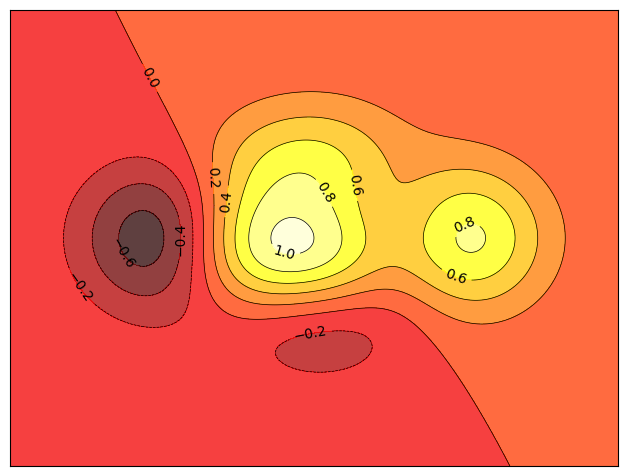

In [28]:
def f(x, y):
    return (1 - x / 2 + x**5 + y**3) * np.exp(-(x**2) - y**2)

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X, Y = np.meshgrid(x, y)

plt.axes((0.025, 0.025, 0.95, 0.95))

plt.contourf(X, Y, f(X, Y), 8, alpha=0.75, cmap="hot")
C = plt.contour(X, Y, f(X, Y), 8, colors="black", linewidths=0.5)
plt.clabel(C, inline=1, fontsize=10)

plt.xticks([])
plt.yticks([]);

::: {exercise-start}
:label: plot-countour-ex
:class: dropdown
:::

Starting from the code below, try to reproduce the graphic taking
care of the colormap (see [Colormaps] below).

:::{hint}
You need to use the {func}`clabel()` command.
:::

/var/folders/vr/b3dbt6vd3pd73sjc_t9xj87r0000gn/T/ipykernel_74512/1788845491.py:10: UserWarning: The following kwargs were not used by contour: 'linewidth'
  C = plt.contour(X, Y, f(X, Y), 8, colors='black', linewidth=.5)


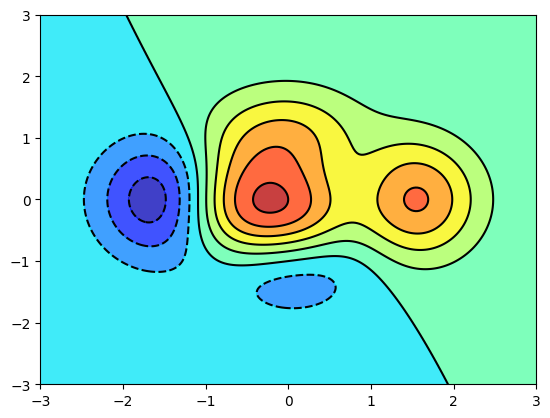

In [29]:
def f(x, y):
    return (1 - x / 2 + x ** 5 + y ** 3) * np.exp(-x ** 2 -y ** 2)

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X, Y = np.meshgrid(x, y)

plt.contourf(X, Y, f(X, Y), 8, alpha=.75, cmap='jet')
C = plt.contour(X, Y, f(X, Y), 8, colors='black', linewidth=.5)

::: {exercise-end}
:::

Click on the hidden code for the figure above for solution.

### Imshow

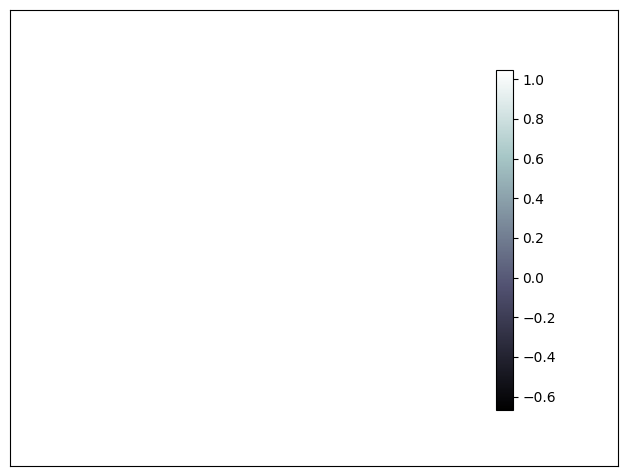

In [30]:
def f(x, y):
    return (1 - x / 2 + x**5 + y**3) * np.exp(-(x**2) - y**2)

n = 10
x = np.linspace(-3, 3, int(3.5 * n))
y = np.linspace(-3, 3, int(3.0 * n))
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.imshow(Z, interpolation="nearest", cmap="bone", origin="lower")
plt.axes((0.025, 0.025, 0.95, 0.95))
plt.colorbar(shrink=0.92)

plt.xticks([])
plt.yticks([]);

::: {exercise-start}
:label: plot-imshow-ex
:class: dropdown
:::

Starting from the code below, try to reproduce the graphic taking
care of colormap, image interpolation and origin.

:::{hint}
You need to take care of the `origin` of the image in the `imshow` command and
use a {func}`colorbar()`
:::

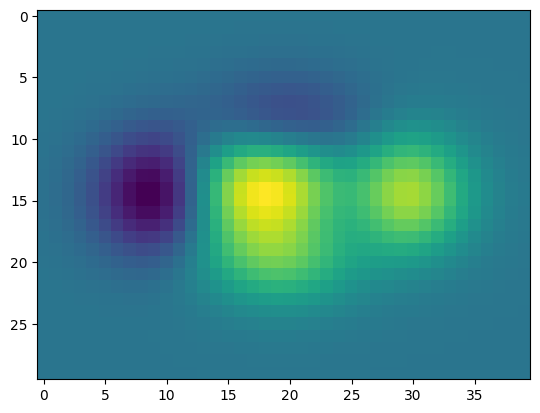

In [31]:
def f(x, y):
    return (1 - x / 2 + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)

n = 10
x = np.linspace(-3, 3, 4 * n)
y = np.linspace(-3, 3, 3 * n)
X, Y = np.meshgrid(x, y)
plt.imshow(f(X, Y))

::: {exercise-end}
:::

Click on the hidden code for the figure above for solution.

### Pie Charts

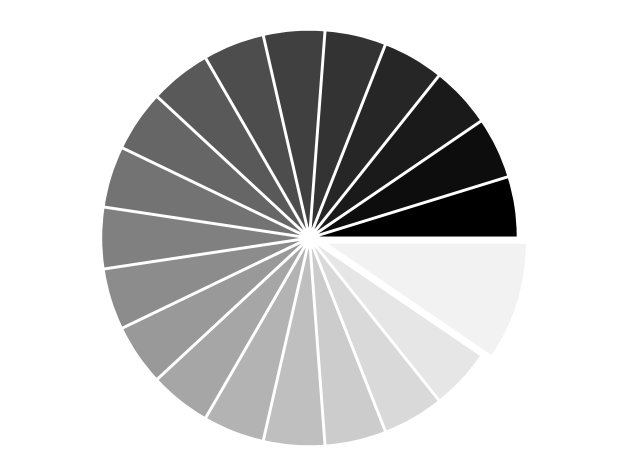

In [32]:
n = 20
Z = np.ones(n)
Z[-1] *= 2

plt.axes((0.025, 0.025, 0.95, 0.95))

plt.pie(Z, explode=Z * 0.05, colors=[f"{i / float(n):f}" for i in range(n)])
plt.axis("equal")
plt.xticks([])
plt.yticks();

::: {exercise-start}
:label: plot-pie-ex
:class: dropdown
:::

Starting from the code below, try to reproduce the graphic taking
care of colors and slices size.

:::{hint}
You need to modify `Z`.
:::

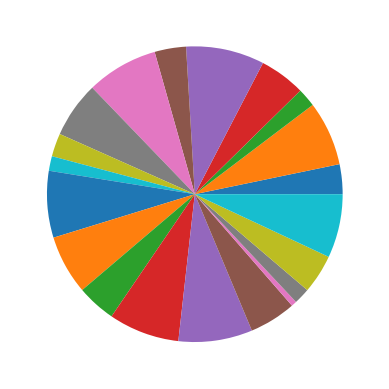

In [33]:
rng = np.random.default_rng()
Z = rng.uniform(0, 1, 20)
plt.pie(Z);

::: {exercise-end}
:::

Click on the hidden code for the figure above for solution.

### Quiver Plots

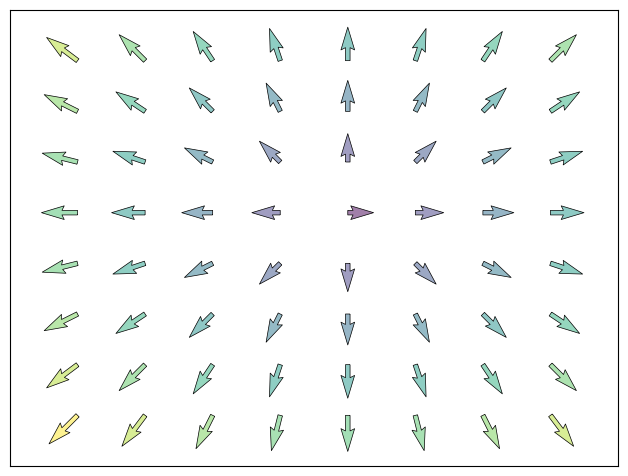

In [34]:
n = 8
X, Y = np.mgrid[0:n, 0:n]
T = np.arctan2(Y - n / 2.0, X - n / 2.0)
R = 10 + np.sqrt((Y - n / 2.0) ** 2 + (X - n / 2.0) ** 2)
U, V = R * np.cos(T), R * np.sin(T)

plt.axes((0.025, 0.025, 0.95, 0.95))
plt.quiver(X, Y, U, V, R, alpha=0.5)
plt.quiver(X, Y, U, V, edgecolor="k", facecolor="None", linewidth=0.5)

plt.xlim(-1, n)
plt.xticks([])
plt.ylim(-1, n)
plt.yticks([]);

::: {exercise-start}
:label: plot-quiver-ex
:class: dropdown
:::

Starting from the code below, try to reproduce the graphic taking
care of colors and orientations.

:::{hint}
You need to draw arrows twice.
:::

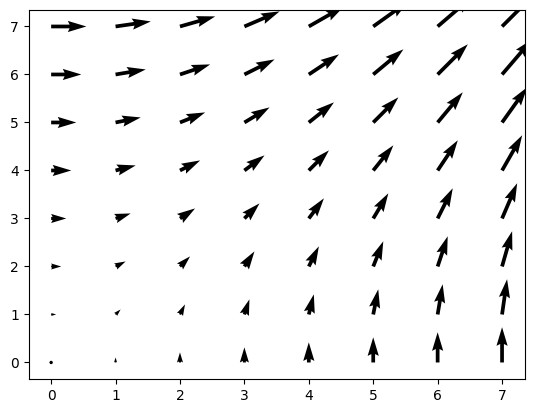

In [35]:
n = 8
X, Y = np.mgrid[0:n, 0:n]
plt.quiver(X, Y)

::: {exercise-end}
:::

Click on the hidden code for the figure above for solution.

### Grids

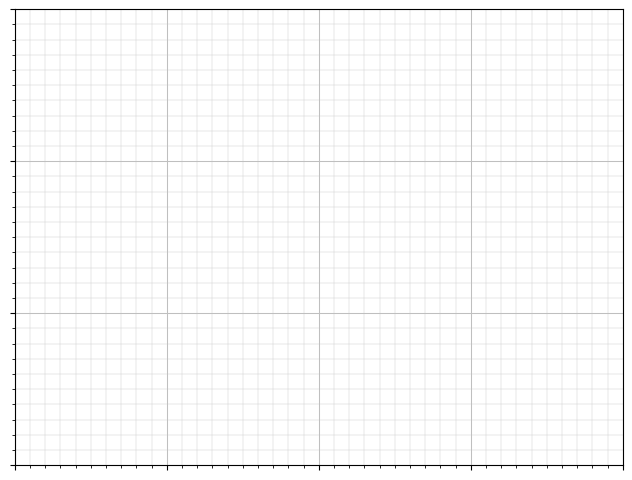

In [36]:
from matplotlib import ticker

ax = plt.axes((0.025, 0.025, 0.95, 0.95))

ax.set_xlim(0, 4)
ax.set_ylim(0, 3)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.0))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1.0))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax.grid(which="major", axis="x", linewidth=0.75, linestyle="-", color="0.75")
ax.grid(which="minor", axis="x", linewidth=0.25, linestyle="-", color="0.75")
ax.grid(which="major", axis="y", linewidth=0.75, linestyle="-", color="0.75")
ax.grid(which="minor", axis="y", linewidth=0.25, linestyle="-", color="0.75")
ax.set_xticklabels([])
ax.set_yticklabels([]);

::: {exercise-start}
:label: plot-grid-ex
:class: dropdown
:::

Starting from the code below, try to reproduce the graphic taking
care of line styles.

[Text(0, 0.0, ''),
 Text(0, 0.5, ''),
 Text(0, 1.0, ''),
 Text(0, 1.5, ''),
 Text(0, 2.0, ''),
 Text(0, 2.5, ''),
 Text(0, 3.0, '')]

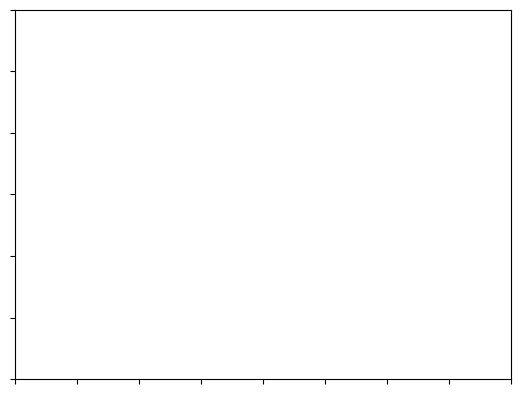

In [37]:
axes = plt.gca()
axes.set_xlim(0, 4)
axes.set_ylim(0, 3)
axes.set_xticklabels([])
axes.set_yticklabels([])

::: {exercise-end}
:::

Click on the hidden code for the figure above for solution.

### Multi Plots

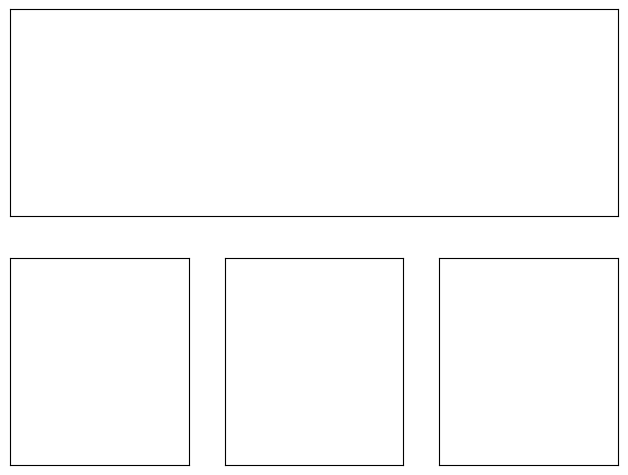

In [38]:
fig = plt.figure()
fig.subplots_adjust(bottom=0.025, left=0.025, top=0.975, right=0.975)

plt.subplot(2, 1, 1)
plt.xticks([]), plt.yticks([])

plt.subplot(2, 3, 4)
plt.xticks([])
plt.yticks([])

plt.subplot(2, 3, 5)
plt.xticks([])
plt.yticks([])

plt.subplot(2, 3, 6)
plt.xticks([])
plt.yticks([]);

::: {exercise-start}
:label: plot-multiplot-ex
:class: dropdown
:::

Starting from the code below, try to reproduce the graphic.

:::{hint}
You can use several subplots with different partition.
:::

<Axes: >

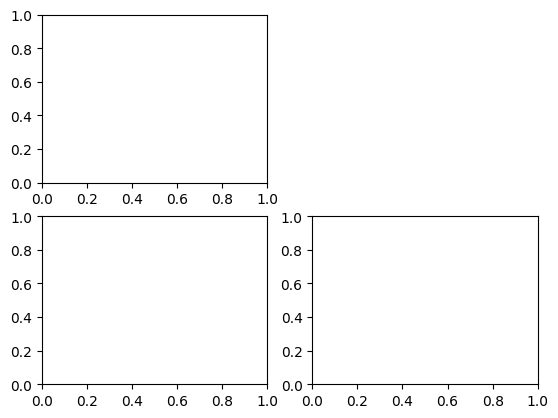

In [39]:
plt.subplot(2, 2, 1)
plt.subplot(2, 2, 3)
plt.subplot(2, 2, 4)

::: {exercise-end}
:::

Click on the hidden code for the figure above for solution.

### Polar Axis

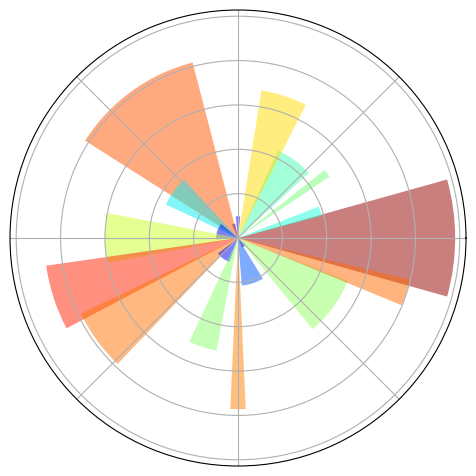

In [40]:
import matplotlib

jet = matplotlib.colormaps["jet"]

ax = plt.axes((0.025, 0.025, 0.95, 0.95), polar=True)

N = 20
theta = np.arange(0.0, 2 * np.pi, 2 * np.pi / N)
rng = np.random.default_rng()
radii = 10 * rng.random(N)
width = np.pi / 4 * rng.random(N)
bars = plt.bar(theta, radii, width=width, bottom=0.0)

for r, bar in zip(radii, bars, strict=True):
    bar.set_facecolor(jet(r / 10.0))
    bar.set_alpha(0.5)

ax.set_xticklabels([])
ax.set_yticklabels([]);

::: {exercise-start}
:label: plot-polar-ex
:class: dropdown
:::

:::{hint}
You only need to modify the `axes` line
:::

Starting from the code below, try to reproduce the graphic.

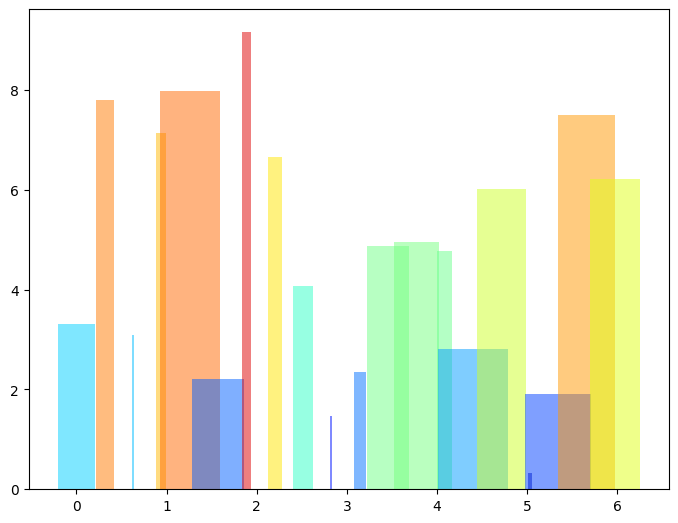

In [41]:
plt.axes([0, 0, 1, 1])

N = 20
theta = np.arange(0., 2 * np.pi, 2 * np.pi / N)
rng = np.random.default_rng()
radii = 10 * rng.random(N)
width = np.pi / 4 * rng.random(N)
bars = plt.bar(theta, radii, width=width, bottom=0.0)

for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r / 10.))
    bar.set_alpha(0.5)

::: {exercise-end}
:::

Click on the hidden code for the figure above for solution.

### 3D Plots

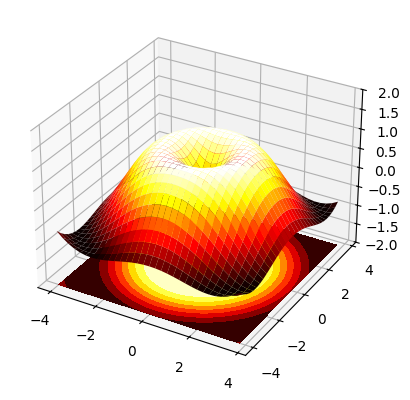

In [42]:
from mpl_toolkits.mplot3d import Axes3D

ax: Axes3D = plt.figure().add_subplot(projection="3d")
x = np.arange(-4, 4, 0.25)
y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap="hot")
ax.contourf(X, Y, Z, zdir="z", offset=-2, cmap="hot")
ax.set_zlim(-2, 2);

::: {exercise-start}
:label: plot-3d-ex
:class: dropdown
:::

Starting from the code below, try to reproduce the graphic.

:::{hint}
You need to use {func}`contourf()`
:::

In [43]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot')

<Figure size 640x480 with 0 Axes>

::: {exercise-end}
:::

Click on the hidden code for the figure above for solution.

### Text

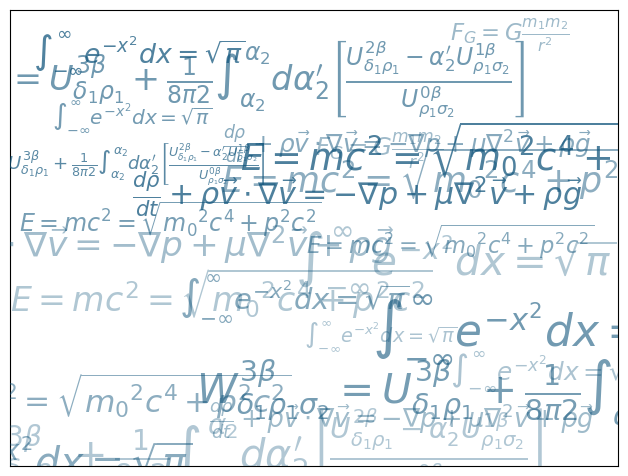

In [44]:
eqs = []
eqs.append(
    r"$W^{3\beta}_{\delta_1 \rho_1 \sigma_2} = U^{3\beta}_{\delta_1 \rho_1} + \frac{1}{8 \pi 2} \int^{\alpha_2}_{\alpha_2} d \alpha^\prime_2 \left[\frac{ U^{2\beta}_{\delta_1 \rho_1} - \alpha^\prime_2U^{1\beta}_{\rho_1 \sigma_2} }{U^{0\beta}_{\rho_1 \sigma_2}}\right]$"
)
eqs.append(
    r"$\frac{d\rho}{d t} + \rho \vec{v}\cdot\nabla\vec{v} = -\nabla p + \mu\nabla^2 \vec{v} + \rho \vec{g}$"
)
eqs.append(r"$\int_{-\infty}^\infty e^{-x^2}dx=\sqrt{\pi}$")
eqs.append(r"$E = mc^2 = \sqrt{{m_0}^2c^4 + p^2c^2}$")
eqs.append(r"$F_G = G\frac{m_1m_2}{r^2}$")

plt.axes((0.025, 0.025, 0.95, 0.95))

rng = np.random.default_rng()

for i in range(24):
    index = rng.integers(0, len(eqs))
    eq = eqs[index]
    size = np.random.uniform(12, 32)
    x, y = np.random.uniform(0, 1, 2)
    alpha = np.random.uniform(0.25, 0.75)
    plt.text(
        x,
        y,
        eq,
        ha="center",
        va="center",
        color="#11557c",
        alpha=alpha,
        transform=plt.gca().transAxes,
        fontsize=size,
        clip_on=True,
    )
plt.xticks([])
plt.yticks([]);

::: {exercise-start}
:label: plot-text-ex
:class: dropdown
:::

Try to do the same from scratch !

:::{hint}
Have a look at the [matplotlib logo](https://matplotlib.org/examples/api/logo2.html).
:::

::: {exercise-end}
:::

Click on the hidden code for the figure above for solution.

---

:::{admonition} Quick read

If you want to do a first quick pass through the Scientific Python Lectures
to learn the ecosystem, you can directly skip to the next chapter:
{ref}`scipy`.

The remainder of this chapter is not necessary to follow the rest of
the intro part. But be sure to come back and finish this chapter later.
:::

## Beyond this tutorial

Matplotlib benefits from extensive documentation as well as a large
community of users and developers. Here are some links of interest:

### Tutorials

- [Pyplot tutorial](https://matplotlib.org/users/pyplot_tutorial.html)

  - Introduction
  - Controlling line properties
  - Working with multiple figures and axes
  - Working with text

- [Image tutorial](https://matplotlib.org/users/image_tutorial.html)

  - Startup commands
  - Importing image data into NumPy arrays
  - Plotting NumPy arrays as images

- [Text tutorial](https://matplotlib.org/users/index_text.html)

  - Text introduction
  - Basic text commands
  - Text properties and layout
  - Writing mathematical expressions
  - Text rendering With LaTeX
  - Annotating text

- [Artist tutorial](https://matplotlib.org/users/artists.html)

  - Introduction
  - Customizing your objects
  - Object containers
  - Figure container
  - Axes container
  - Axis containers
  - Tick containers

- [Path tutorial](https://matplotlib.org/users/path_tutorial.html)

  - Introduction
  - Bézier example
  - Compound paths

- [Transforms tutorial](https://matplotlib.org/users/transforms_tutorial.html)

  - Introduction
  - Data coordinates
  - Axes coordinates
  - Blended transformations
  - Using offset transforms to create a shadow effect
  - The transformation pipeline

### Matplotlib documentation

- [User guide](https://matplotlib.org/users/index.html)

- [FAQ](https://matplotlib.org/faq/index.html)

  - Installation
  - Usage
  - How-To
  - Troubleshooting
  - Environment Variables

- [Screenshots](https://matplotlib.org/users/screenshots.html)

### Code documentation

The code is well documented and you can quickly access a specific command
from within a python session:

In [45]:
import matplotlib.pyplot as plt
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'
    Plot y versus x as lines and/or markers.

    Call signatures::

        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

    The coordinates of the points or line nodes are given by *x*, *y*.

    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.

    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses

    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line pro

### Galleries

The [matplotlib gallery](https://matplotlib.org/gallery.html) is
also incredibly useful when you search how to render a given graphic. Each
example comes with its source.

### Mailing lists

Finally, there is a [user mailing
list](https://mail.python.org/mailman/listinfo/matplotlib-users) where you can
ask for help and a [developers mailing
list](https://mail.python.org/mailman/listinfo/matplotlib-devel) that is more
technical.

## Quick reference

Here is a set of tables that show main properties and styles.

(mpl-line-properties)=

### Line properties

::: {list-table}
:header-rows: 1
:widths: 20 30 50

- - Property
  - Description
  - Appearance

- - alpha (or a)
  - alpha transparency on 0-1 scale
  - ::: {glue} plot_alpha
    :doc: quick_reference_figures.md
    :::

- - anti-aliased
  - True or False - use anti-aliased rendering
  - ::: {glue} plot_aliased
    :doc: quick_reference_figures.md
    :::
    ::: {glue} plot_antialiased
    :doc: quick_reference_figures.md
    :::

- - color (or c)
  - matplotlib color arg
  - ::: {glue} plot_color
    :doc: quick_reference_figures.md
    :::

- - linestyle (or ls)
  - see [Line properties](mpl-line-properties)
  -

- - linewidth (or lw)
  - float, the line width in points
  - ::: {glue} plot_linewidth
    :doc: quick_reference_figures.md
    :::

- - solid_capstyle
  - Cap style for solid lines
  - ::: {glue} plot_solid_capstyle
    :doc: quick_reference_figures.md
    :::

- - solid_joinstyle
  - Join style for solid lines
  - ::: {glue} plot_solid_joinstyle
    :doc: quick_reference_figures.md
    :::

- - dash_capstyle
  - Cap style for dashes
  - ::: {glue} plot_dash_capstyle
    :doc: quick_reference_figures.md
    :::

- - dash_joinstyle
  - Join style for dashes
  - ::: {glue} plot_dash_joinstyle
    :doc: quick_reference_figures.md
    :::

- - marker
  - see [Markers](mpl-markers)
  -

- - markeredgewidth (mew)
  - line width around the marker symbol
  - ::: {glue} plot_mew
    :doc: quick_reference_figures.md
    :::

- - markeredgecolor (mec)
  - edge color if a marker is used
  - ::: {glue} plot_mec
    :doc: quick_reference_figures.md
    :::

- - markerfacecolor (mfc)
  - face color if a marker is used
  - ::: {glue} plot_mfc
    :doc: quick_reference_figures.md
    :::

- - markersize (ms)
  - size of the marker in points
  - ::: {glue} plot_ms
    :doc: quick_reference_figures.md
    :::

:::

See the [Line property figures](mpl-line-property-figures) for code to
generate graphics for the table above.

(mpl-line-styles)=

### Line styles

::: {glue} line_styles_fig
:doc: quick_reference_figures.md
:::

See [Line style figure](mpl-line-style-figure) for code.

(mpl-markers)=

### Markers

::: {glue} marker_styles_fig
:doc: quick_reference_figures.md
:::

See [Marker style figure](mpl-marker-style-figure) for code.

### Colormaps

All colormaps can be reversed by appending `_r`. For instance, `gray_r` is
the reverse of `gray`.

If you want to know more about colormaps, check the [documentation on Colormaps in matplotlib](https://matplotlib.org/tutorials/colors/colormaps.html).

::: {glue} colormap_fig
:doc: quick_reference_figures.md
:::

See [Colormap figure](mpl-colormap-figure) for code.